# Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import scipy.cluster.hierarchy as sch


# Importing Dataset

In [2]:
df=pd.read_csv('daily_dataset.csv', parse_dates=["day"],index_col ="day")
df.reset_index(inplace=True)
piv=df.pivot(index='day',columns='LCLid', values='energy_sum')

# Converting Data

In [3]:
piv.reset_index(inplace=True)
from datetime import datetime, date
piv['Year-Month']=piv['day'].dt.strftime('%Y-%m')

gr=piv.groupby('Year-Month').mean()

result = gr.transpose() 

ipl=result.interpolate(method='linear', limit_direction='both', axis=1)

new_data = ipl.dropna(axis = 0, how ='any') 


# Importing Libraries and Standardization

In [4]:
from sklearn import preprocessing

normalized_data = preprocessing.normalize(new_data)

from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
X=pd.DataFrame(normalized_data)

X_scaled = X

# Silhouette Score and Davies Boulding  

Silhouette score for number of cluster(s) 2: 0.414423137111712
Davies Bouldin score for number of cluster(s) 2: 1.6518480229206711
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 3: 0.385587493569441
Davies Bouldin score for number of cluster(s) 3: 1.545824638149626
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 4: 0.09710497369933649
Davies Bouldin score for number of cluster(s) 4: 2.026034071566375
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 5: 0.10384383284728962
Davies Bouldin score for number of cluster(s) 5: 2.057323431778252
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 6: 0.10711262559230475
Davies

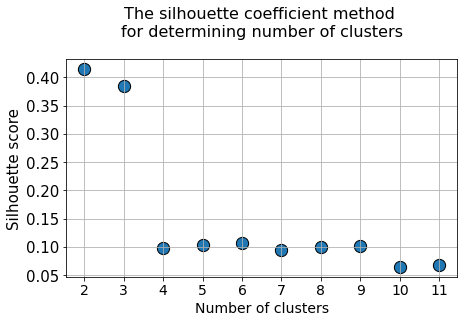

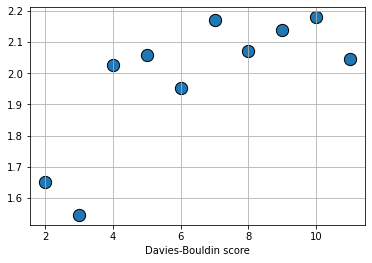

In [5]:
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
    preds=hc.fit_predict(X_scaled)
    #print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    #km_scores.append(-km.score(X_scaled))
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    print("-"*100)
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

# Gaussian Mixture and BIC Score

BIC for number of cluster(s) 2: -808616.2850145971
Log-likelihood score for number of cluster(s) 2: 73.37800174330364
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -839719.6836296185
Log-likelihood score for number of cluster(s) 3: 76.51184777538852
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -850189.4950411118
Log-likelihood score for number of cluster(s) 4: 77.79048905980858
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -855654.2876728472
Log-likelihood score for number of cluster(s) 5: 78.61911966451653
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -863994.362071228
Log-likelihood score for number of cluster(s) 6: 79.70627227665531
-------

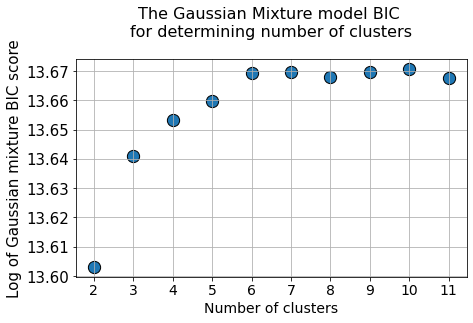

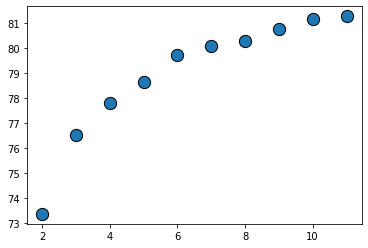

In [6]:
from sklearn.mixture import GaussianMixture

gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()